# PyTorch tutorial

In [1]:
import numpy as np
import torch 

In [2]:
torch.__version__

'1.11.0'

## Tensors

In [3]:
torch.FloatTensor(2, 3)

tensor([[ 0.0000e+00, -0.0000e+00,  2.1793e-26],
        [-8.5899e+09,  8.4078e-45,  0.0000e+00]])

In [5]:
torch.FloatTensor(2, 3).zero_()

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [6]:
torch.FloatTensor(np.random.random((2, 3)))

tensor([[0.3428, 0.8489, 0.9058],
        [0.9203, 0.7877, 0.1695]])

In [7]:
torch.from_numpy(np.random.random((2, 3)))

tensor([[0.9778, 0.5408, 0.5480],
        [0.0875, 0.5451, 0.9959]], dtype=torch.float64)

In [8]:
torch.randn(2, 3)

tensor([[-0.5415,  0.2943,  1.0134],
        [-0.9688,  0.6885, -1.7732]])

In [10]:
x = torch.randn(2, 3)
x.size(), x.shape, x.type(), x.dtype

(torch.Size([2, 3]), torch.Size([2, 3]), 'torch.FloatTensor', torch.float32)

In [11]:
torch.sum(x), x.sum()

(tensor(-0.2022), tensor(-0.2022))

In [12]:
torch.sum(torch.exp(x))

tensor(7.2523)

In [14]:
torch.mean(x), x.mean()

(tensor(-0.0337), tensor(-0.0337))

In [16]:
x[1,:]

tensor([-0.0730,  1.0763, -0.0052])

In [18]:
y = x.cuda()

AssertionError: Torch not compiled with CUDA enabled

In [21]:
x.is_cuda

False

In [22]:
x.cpu()

tensor([[-0.3334, -1.1825,  0.3157],
        [-0.0730,  1.0763, -0.0052]])

In [23]:
if torch.cuda.is_available():
    x = x.cuda()

## Automatic differentiation

In [46]:
x = torch.arange(0, 4).float().requires_grad_(True)
x.dtype

torch.float32

In [47]:
y = x ** 2

In [48]:
y.sum()

tensor(14., grad_fn=<SumBackward0>)

In [49]:
y.sum().backward()

In [50]:
x.grad

tensor([0., 2., 4., 6.])

In [38]:
y.sum().grad

/Users/steve/.local/share/virtualenvs/teaching-kL1iKbCK/lib/python3.8/site-packages/torch/_tensor.py:1104: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  /Users/distiller/project/pytorch/build/aten/src/ATen/core/TensorBody.h:475.)
  return self._grad


## Neural network

In [53]:
net = torch.nn.Sequential(
    torch.nn.Linear(32,128),
    torch.nn.Sigmoid(),
    torch.nn.Linear(128,10)
)

In [54]:
class MyNetwork(torch.nn.Module):
    def __init__(self,input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = torch.nn.Linear(input_size,hidden_size)
        self.layer2 = torch.nn.Sigmoid()
        self.layer3 = torch.nn.Linear(hidden_size,output_size)

    def forward(self, x):
        h = self.layer1(x)
        h = self.layer2(h)
        h = self.layer3(h)
        return h

net = MyNetwork(32,128,10)

In [58]:
for param in net.parameters():
    print(param.shape, type(param))

torch.Size([128, 32]) <class 'torch.nn.parameter.Parameter'>
torch.Size([128]) <class 'torch.nn.parameter.Parameter'>
torch.Size([10, 128]) <class 'torch.nn.parameter.Parameter'>
torch.Size([10]) <class 'torch.nn.parameter.Parameter'>


In [59]:
x = torch.tensor([np.arange(32), np.zeros(32),np.ones(32)]).float()
y = torch.tensor([0,3,9])
criterion = torch.nn.CrossEntropyLoss()

output = net(x)
loss = criterion(output,y)
print(loss)

tensor(2.1070, grad_fn=<NllLossBackward0>)


/var/folders/kd/773vphv51bdclptjzptm_4km0000gn/T/ipykernel_22307/2553623551.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/distiller/project/pytorch/torch/csrc/utils/tensor_new.cpp:210.)
  x = torch.tensor([np.arange(32), np.zeros(32),np.ones(32)]).float()


In [60]:
loss.backward()

# Check that the parameters now have gradients
for param in net.parameters():
    print(param.grad)

tensor([[ 1.2336e-04,  1.1817e-04,  1.1297e-04,  ..., -2.7387e-05,
         -3.2586e-05, -3.7784e-05],
        [ 4.0683e-03,  4.0683e-03,  4.0683e-03,  ...,  4.0683e-03,
          4.0683e-03,  4.0683e-03],
        [ 4.6966e-03,  1.0115e-02,  1.5534e-02,  ...,  1.6184e-01,
          1.6725e-01,  1.7267e-01],
        ...,
        [ 2.7773e-03,  2.7779e-03,  2.7786e-03,  ...,  2.7959e-03,
          2.7966e-03,  2.7972e-03],
        [-2.6626e-04, -1.4633e-04, -2.6400e-05,  ...,  3.2117e-03,
          3.3316e-03,  3.4516e-03],
        [ 2.4058e-05,  2.4054e-05,  2.4050e-05,  ...,  2.3934e-05,
          2.3929e-05,  2.3925e-05]])
tensor([-0.0017, -0.0018,  0.0095,  0.0017,  0.0046, -0.0064, -0.0030, -0.0081,
         0.0018, -0.0042,  0.0047, -0.0006,  0.0036,  0.0058,  0.0036,  0.0020,
         0.0004, -0.0040,  0.0008, -0.0047, -0.0015, -0.0033, -0.0004,  0.0083,
        -0.0083, -0.0032, -0.0093,  0.0025,  0.0011, -0.0017, -0.0022,  0.0009,
        -0.0085, -0.0046,  0.0029,  0.0024,  0.0

In [61]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
# In a training loop, we should perform many GD iterations.
n_iter = 1000
for i in range(n_iter):
    optimizer.zero_grad() # equivalent to net.zero_grad()
    output = net(x)
    loss = criterion(output,y)
    loss.backward()
    optimizer.step()
    print(loss)

tensor(2.1070, grad_fn=<NllLossBackward0>)
tensor(1.9956, grad_fn=<NllLossBackward0>)
tensor(1.8986, grad_fn=<NllLossBackward0>)
tensor(1.8122, grad_fn=<NllLossBackward0>)
tensor(1.7342, grad_fn=<NllLossBackward0>)
tensor(1.6636, grad_fn=<NllLossBackward0>)
tensor(1.5996, grad_fn=<NllLossBackward0>)
tensor(1.5414, grad_fn=<NllLossBackward0>)
tensor(1.4880, grad_fn=<NllLossBackward0>)
tensor(1.4387, grad_fn=<NllLossBackward0>)
tensor(1.3927, grad_fn=<NllLossBackward0>)
tensor(1.3497, grad_fn=<NllLossBackward0>)
tensor(1.3092, grad_fn=<NllLossBackward0>)
tensor(1.2710, grad_fn=<NllLossBackward0>)
tensor(1.2353, grad_fn=<NllLossBackward0>)
tensor(1.2021, grad_fn=<NllLossBackward0>)
tensor(1.1714, grad_fn=<NllLossBackward0>)
tensor(1.1432, grad_fn=<NllLossBackward0>)
tensor(1.1171, grad_fn=<NllLossBackward0>)
tensor(1.0929, grad_fn=<NllLossBackward0>)
tensor(1.0704, grad_fn=<NllLossBackward0>)
tensor(1.0494, grad_fn=<NllLossBackward0>)
tensor(1.0298, grad_fn=<NllLossBackward0>)
tensor(1.01

In [62]:
output = net(x)
print(output)
print(y)

tensor([[ 7.9481, -1.4883, -1.7687,  0.3211, -1.7742, -1.6009, -1.3723, -1.5065,
         -1.3583,  4.0613],
        [ 0.4477, -1.4396, -1.4378,  6.1054, -1.2568, -1.3690, -1.3046, -1.3322,
         -1.2807,  3.5762],
        [ 1.9429, -1.4073, -1.3275,  3.1912, -1.2864, -1.4613, -1.4186, -1.4819,
         -1.3147,  5.7723]], grad_fn=<AddmmBackward0>)
tensor([0, 3, 9])


In [63]:
# get dictionary of keys to weights using `state_dict`
print(net.state_dict().keys())

odict_keys(['layer1.weight', 'layer1.bias', 'layer3.weight', 'layer3.bias'])


In [64]:
# save a dictionary
torch.save(net.state_dict(),'test.t7')
# load a dictionary
net.load_state_dict(torch.load('test.t7'))

<All keys matched successfully>

# MNIST with PyTorch

In [70]:
# download using tensorflow's keras
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [73]:
x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [74]:
x_train.shape, y_train.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [75]:
x_test.shape, y_test.shape

(torch.Size([10000, 28, 28]), torch.Size([10000]))

In [76]:
import matplotlib.pyplot as plt

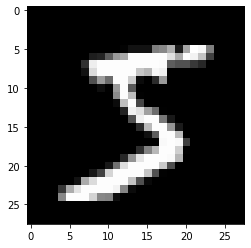

In [77]:
plt.imshow(x_train.cpu().numpy()[0], cmap='gray')

## Dataloader

In [78]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.Y)

    def __getitem__(self,index):
        X = self.X[index].float().reshape(-1)  # flatten input to 1D
        Y = self.Y[index].long()
        return X,Y

In [79]:
num_workers = 8 if torch.cuda.is_available() else 0 

if torch.cuda.is_available():
    loader_args = dict(shuffle=True, batch_size=256, num_workers=num_workers, pin_memory=True)
else:
    loader_args = dict(shuffle=True, batch_size=64)

train_dataset = MyDataset(x_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, **loader_args)

test_dataset = MyDataset(x_test, y_test)
test_loader = torch.utils.data.DataLoader(test_dataset, **loader_args)

## Neural network model

In [82]:
class SimpleMLP(torch.nn.Module):
    def __init__(self, size_list):
        super(SimpleMLP, self).__init__()
        self.size_list = size_list
        layers = []
        for i in range(len(size_list) - 2):
            layers.append(torch.nn.Linear(size_list[i], size_list[i+1]))
            layers.append(torch.nn.ReLU())
        layers.append(torch.nn.Linear(size_list[-2], size_list[-1]))
        self.net = torch.nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

In [83]:
model = SimpleMLP([784, 256, 10])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(model)

SimpleMLP(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=10, bias=True)
  )
)


## Optimizer

In [84]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

## Training and testing

In [85]:
import time 

def train_epoch(model, train_loader, criterion, optimizer):
    model.train()

    running_loss = 0.0
    
    start_time = time.time()
    for batch_idx, (data, target) in enumerate(train_loader):   
        optimizer.zero_grad()   # .backward() accumulates gradients
        data = data.to(device)
        target = target.to(device) # all data & model on same device

        outputs = model(data)
        loss = criterion(outputs, target)
        running_loss += loss.item()

        loss.backward()
        optimizer.step()
    
    end_time = time.time()
    
    running_loss /= len(train_loader)
    print('Training Loss: ', running_loss, 'Time: ',end_time - start_time, 's')
    return running_loss

In [86]:
def test_model(model, test_loader, criterion):
    with torch.no_grad():
        model.eval()

        running_loss = 0.0
        total_predictions = 0.0
        correct_predictions = 0.0

        for batch_idx, (data, target) in enumerate(test_loader):   
            data = data.to(device)
            target = target.to(device)

            outputs = model(data)

            _, predicted = torch.max(outputs.data, 1)
            total_predictions += target.size(0)
            correct_predictions += (predicted == target).sum().item()

            loss = criterion(outputs, target).detach()
            running_loss += loss.item()

        running_loss /= len(test_loader)
        acc = (correct_predictions/total_predictions)*100.0
        print('Testing Loss: ', running_loss)
        print('Testing Accuracy: ', acc, '%')
        return running_loss, acc

## Training loop

In [87]:
n_epochs = 10
Train_loss = []
Test_loss = []
Test_acc = []

for i in range(n_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer)
    test_loss, test_acc = test_model(model, test_loader, criterion)
    Train_loss.append(train_loss)
    Test_loss.append(test_loss)
    Test_acc.append(test_acc)
    print('='*20)

Training Loss:  0.6010991137113366 Time:  1.5142881870269775 s
Testing Loss:  0.23001872079601143
Testing Accuracy:  93.86 %
Training Loss:  0.17382219839078594 Time:  1.4538118839263916 s
Testing Loss:  0.20230218895954216
Testing Accuracy:  94.33 %
Training Loss:  0.16147767579970337 Time:  1.4976067543029785 s
Testing Loss:  0.19275677901215163
Testing Accuracy:  95.57 %
Training Loss:  0.15502203193960834 Time:  1.4669489860534668 s
Testing Loss:  0.18249313689317484
Testing Accuracy:  95.47 %
Training Loss:  0.15835566082064545 Time:  1.4363429546356201 s
Testing Loss:  0.24243782043373982
Testing Accuracy:  95.24000000000001 %
Training Loss:  0.14927374951338876 Time:  1.4931590557098389 s
Testing Loss:  0.2550597030352089
Testing Accuracy:  95.17 %
Training Loss:  0.15360962421659863 Time:  1.5303921699523926 s
Testing Loss:  0.2034646226893992
Testing Accuracy:  95.92 %
Training Loss:  0.14168071359766946 Time:  1.4728069305419922 s
Testing Loss:  0.24940808023515923
Testing Ac

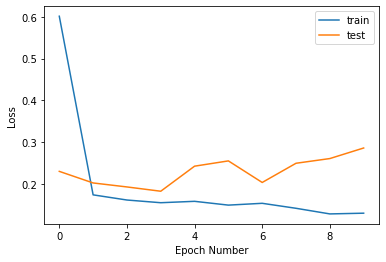

In [90]:
# plt.title('Training Loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(Train_loss, label='train')
plt.plot(Test_loss, label='test')
plt.legend();

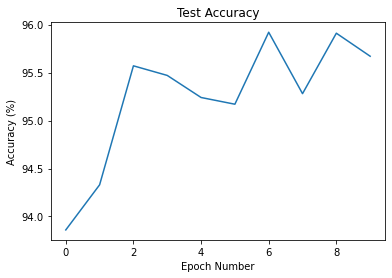

In [92]:
plt.title('Test Accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy (%)')
plt.plot(Test_acc);